In [112]:
import requests
from lxml import html

pageContent=requests.get(
     'https://www.airbnb.com/users/show/4358294'
)
tree = html.fromstring(pageContent.content)

In [106]:
# guest_rev=tree.xpath(
#     '//*[@id="review-99962666"]/div[1]/div/a/@href')
# host_rev=tree.xpath(
#     '//div[@class="expandable-content"]//text()')
# #bronzeWinner we need rows where there's no rowspan - note XPath
# bronzeWinners=tree.xpath(
# '//*[@id="mw-content-text"]/table/tr/td[not(@rowspan=2)]/a[1]/text()')

revs = host_rev

In [113]:
revs = tree.xpath('//div[@class="expandable-content"]/p//text()')
reviews={}
for r in revs:
    if reviews.has_key(r):
        reviews[r]=reviews[r]+1
    else:
        reviews[r]=1

In [114]:
len(reviews)

10

In [115]:
for result in sorted(reviews.items(), key=lambda x:x[1],reverse=True):
      print '%s:%s' % result

I liked the fact that Inessa was neat and clean. I think she appreciated the improvised ironing board; and I enjoyed seeing her, as part of the new MIT lady's gang, chat with 2 members of the old MIT lady's gang. What a group of accomplished women!:1
Inessa and her brother were very pleasant, easy guests.  We'd definitely host them again!:1
Inessa was great to host!  Communicated her arrival and departure plans, and left the space very neat.:1
Excellent guest. Highly recommend. Could not tell she had been there.:1
Inessa was a great guest who is always welcome back. :1
Inessa is awesome!  She was a blast to hang out with, always considerate, clean, and outgoing. We had so much fun hanging out and getting to know Inessa over her short trip to Austin and I would recommend her to anyone :1
Inessa was a wonderful guest! She was clean, sweet and followed all house rules. I would gladly host her again! :1
Inessa was a fantastic guest - friendly, tidy and respectful. I would thoroughly recomm

In [110]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.select import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
driver = webdriver.PhantomJS('/Users/Saman/Downloads/phantomjs-2.1.1-macosx 2/bin/phantomjs')
driver.get("https://www.airbnb.com/users/show/4358294")

# waiting for the page to load - TODO: change
wait = WebDriverWait(driver, 100)
wait.until(EC.visibility_of_element_located((By.ID, "content")))

data = driver.page_source
driver.close()

soup = BeautifulSoup(data, "html.parser")

TimeoutException: Message: 
Screenshot: available via screen


In [119]:
import os
import pandas as pd
import numpy as np 

os.chdir("/Users/Saman/Dropbox (UNC Charlotte)/Kexin_Reza/Sharing Economy/jonloyens-inside-airbnb-austin")

In [174]:
listings = pd.read_csv("listings.csv", na_values=["NaN"])
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,72635,https://www.airbnb.com/rooms/72635,2.015110e+13,11/8/2015,"3 Private Bedrooms, SW Austin",Conveniently located 10-15 from downtown in SW...,"We have three spare bedrooms, each with a quee...",Conveniently located 10-15 from downtown in SW...,none,Location and convenience are key. Easy access...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,0.02
1,5386323,https://www.airbnb.com/rooms/5386323,2.015110e+13,11/7/2015,Cricket Trailer,Rent this cool concept trailer that has everyt...,Rental arrangements for this trailer allows yo...,Rent this cool concept trailer that has everyt...,none,We're talking about wherever you'd like in the...,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
2,8826517,https://www.airbnb.com/rooms/8826517,2.015110e+13,11/7/2015,Private room 1 in South Austin,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 12ft x 13 1/2ft room. Priv...",none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,2,NaN
3,8828616,https://www.airbnb.com/rooms/8828616,2.015110e+13,11/8/2015,Private room 2 in South Austin,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",NaN,"Upstairs, private, 11ft x 13 1/2ft room. Priv...",none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,2,NaN
4,8536913,https://www.airbnb.com/rooms/8536913,2.015110e+13,11/8/2015,Brand-New 3BR Austin Home,Brand-new 3BR/2BA Austin home with landscaped ...,Feel instantly at home at our brand new 3BR/2B...,Brand-new 3BR/2BA Austin home with landscaped ...,none,Entertainment and activities are plentiful her...,...,NaN,f,NaN,NaN,f,strict,f,f,2,NaN


In [175]:
listings.columns

Index([u'id', u'listing_url', u'scrape_id', u'last_scraped', u'name',
       u'summary', u'space', u'description', u'experiences_offered',
       u'neighborhood_overview', u'notes', u'transit', u'thumbnail_url',
       u'medium_url', u'picture_url', u'xl_picture_url', u'host_id',
       u'host_url', u'host_name', u'host_since', u'host_location',
       u'host_about', u'host_response_time', u'host_response_rate',
       u'host_acceptance_rate', u'host_is_superhost', u'host_thumbnail_url',
       u'host_picture_url', u'host_neighbourhood', u'host_listings_count',
       u'host_total_listings_count', u'host_verifications',
       u'host_has_profile_pic', u'host_identity_verified', u'street',
       u'neighbourhood', u'neighbourhood_cleansed',
       u'neighbourhood_group_cleansed', u'city', u'state', u'zipcode',
       u'market', u'smart_location', u'country_code', u'country', u'latitude',
       u'longitude', u'is_location_exact', u'property_type', u'room_type',
       u'accommodates', u

In [176]:
listings.dtypes

id                                    int64
listing_url                          object
scrape_id                           float64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [177]:
listings = listings.sort(['host_id','host_acceptance_rate'])
# listings = listings.fillna(0)
listings.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
603,956655,https://www.airbnb.com/rooms/956655,2.015110e+13,11/7/2015,Artsy Austin-South Congress 78744,NaN,My home is a 4 bedroom 3 bath home with 1900 ...,My home is a 4 bedroom 3 bath home with 1900 ...,none,We moved to our new South Austin neighbor hood...,...,8.0,f,NaN,NaN,f,moderate,t,t,1,0.03
1678,5245,https://www.airbnb.com/rooms/5245,2.015110e+13,11/7/2015,"Green, colorful, clean & cozy home",NaN,"This green, colorful, clean and cozy house was...","This green, colorful, clean and cozy house was...",none,"Close to downtown, UT, SoCo area, hike and bik...",...,9.0,f,NaN,NaN,f,strict,f,f,2,0.07
2455,2265,https://www.airbnb.com/rooms/2265,2.015110e+13,11/7/2015,Zen-East in the Heart of Austin,NaN,"Please note higher rates during SXSW, Formula ...","Please note higher rates during SXSW, Formula ...",none,NaN,...,8.0,f,NaN,NaN,f,strict,f,f,2,0.15
501,689166,https://www.airbnb.com/rooms/689166,2.015110e+13,11/7/2015,North Central Austin Private Room,NaN,The residence is located 4.5 miles from downto...,The residence is located 4.5 miles from downto...,none,Its very safe and quiet. There is a police sub...,...,NaN,f,NaN,NaN,f,strict,f,f,1,NaN
5510,340710,https://www.airbnb.com/rooms/340710,2.015110e+13,11/7/2015,SXSW Rental! 10 min from it all!,NaN,My boyfriend and I are putting up our apartmen...,My boyfriend and I are putting up our apartmen...,none,NaN,...,NaN,f,NaN,NaN,f,flexible,f,f,1,NaN


In [178]:
listings[['host_acceptance_rate']] = listings[['host_acceptance_rate']].replace('%','',regex=True).astype('float')/100
print(listings.dtypes)

id                                    int64
listing_url                          object
scrape_id                           float64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [179]:
import statsmodels.formula.api as sm

result = sm.ols(formula="host_acceptance_rate ~ review_scores_value + host_listings_count", data=listings).fit()
print result.summary()

                             OLS Regression Results                             
Dep. Variable:     host_acceptance_rate   R-squared:                       0.002
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     3.141
Date:                  Fri, 16 Jun 2017   Prob (F-statistic):             0.0434
Time:                          14:14:45   Log-Likelihood:                 612.43
No. Observations:                  3209   AIC:                            -1219.
Df Residuals:                      3206   BIC:                            -1201.
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                          coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------------
Intercept     

In [180]:
listings[["host_acceptance_rate","review_scores_value","host_listings_count"]].head()

,host_acceptance_rate,review_scores_value,host_listings_count
603,NaN,8.0,1.0
1678,1.0,9.0,2.0
2455,1.0,8.0,2.0
501,NaN,NaN,1.0
5510,NaN,NaN,1.0


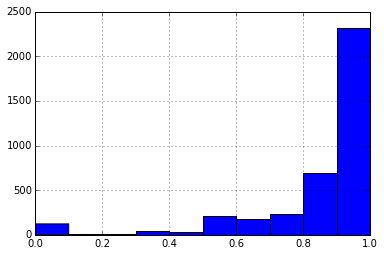

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
listings['host_acceptance_rate'].hist()